In [19]:
#!/.conda/envs/dp python
# -*- coding: utf-8 -*-

"""
根据类别标准差优化训练集
~~~~~~~~~~~~~~~~
code by wHy
Aerospace Information Research Institute, Chinese Academy of Sciences
wanghaoyu191@mails.ucas.ac.cn
"""
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import os
import shutil

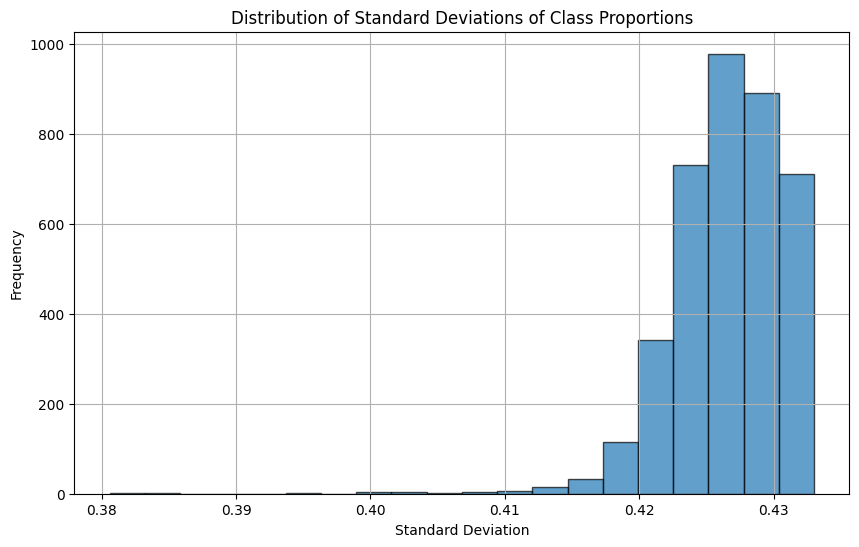

In [20]:
def compute_class_proportions(image_path):
    # Load image
    image = Image.open(image_path).convert('L')
    image_array = np.array(image)
    
    # Calculate total number of pixels
    total_pixels = image_array.size
    
    # Count the number of pixels for each class (assuming 4 classes: 0, 1, 2, 3)
    class_counts = np.bincount(image_array.flatten(), minlength=4)
    
    # Calculate proportions of each class
    class_proportions = class_counts / total_pixels
    
    return class_proportions

def compute_std_deviation_of_class_proportions(class_proportions):
    # Calculate the standard deviation of class proportions
    return np.std(class_proportions)

def process_images(ori_image_folder, ori_label_folder, threshold, output_image_folder, output_label_folder):
    std_devs = []
    
    # Ensure the output folder exists
    if not os.path.exists(output_image_folder):
        os.makedirs(output_image_folder)
    if not os.path.exists(output_label_folder):
        os.makedirs(output_label_folder)

    # List all files in the folder
    for filename in os.listdir(ori_label_folder):
        if filename.endswith('.png'):
            image_path = os.path.join(ori_image_folder, filename)
            label_path = os.path.join(ori_label_folder, filename)

            
            class_proportions = compute_class_proportions(label_path)
            std_dev = compute_std_deviation_of_class_proportions(class_proportions)
            std_devs.append(std_dev)
            
            # Check if the standard deviation is less than the threshold
            if std_dev < threshold:
                # Copy the image to the output folder
                shutil.copy(image_path, os.path.join(output_image_folder, filename))                
                shutil.copy(label_path, os.path.join(output_label_folder, filename))
    
    return std_devs

def plot_std_devs(std_devs):
    plt.figure(figsize=(10, 6))
    plt.hist(std_devs, bins=20, edgecolor='k', alpha=0.7)
    plt.title('Distribution of Standard Deviations of Class Proportions')
    plt.xlabel('Standard Deviation')
    plt.ylabel('Frequency')
    plt.grid(True)
    plt.show()

# Path to the folder containing the images
ori_image_folder = r'D:\project_wuhaoru\1-clip_img'
ori_label_folder = r'D:\project_wuhaoru\1-raster_label_only_road'
# Path to the folder where images with std_dev < threshold will be saved
output_img_folder = r'D:\project_wuhaoru\1-clip_img_only_road_refine'
output_label_folder = r'D:\project_wuhaoru\1-raster_label_only_road_refine'
# Set the threshold for the standard deviation
threshold = 0.423

# Process the images and get the standard deviations
std_devs = process_images(ori_image_folder, ori_label_folder, threshold, output_img_folder, output_label_folder)

# Plot the distribution of standard deviations
plot_std_devs(std_devs)